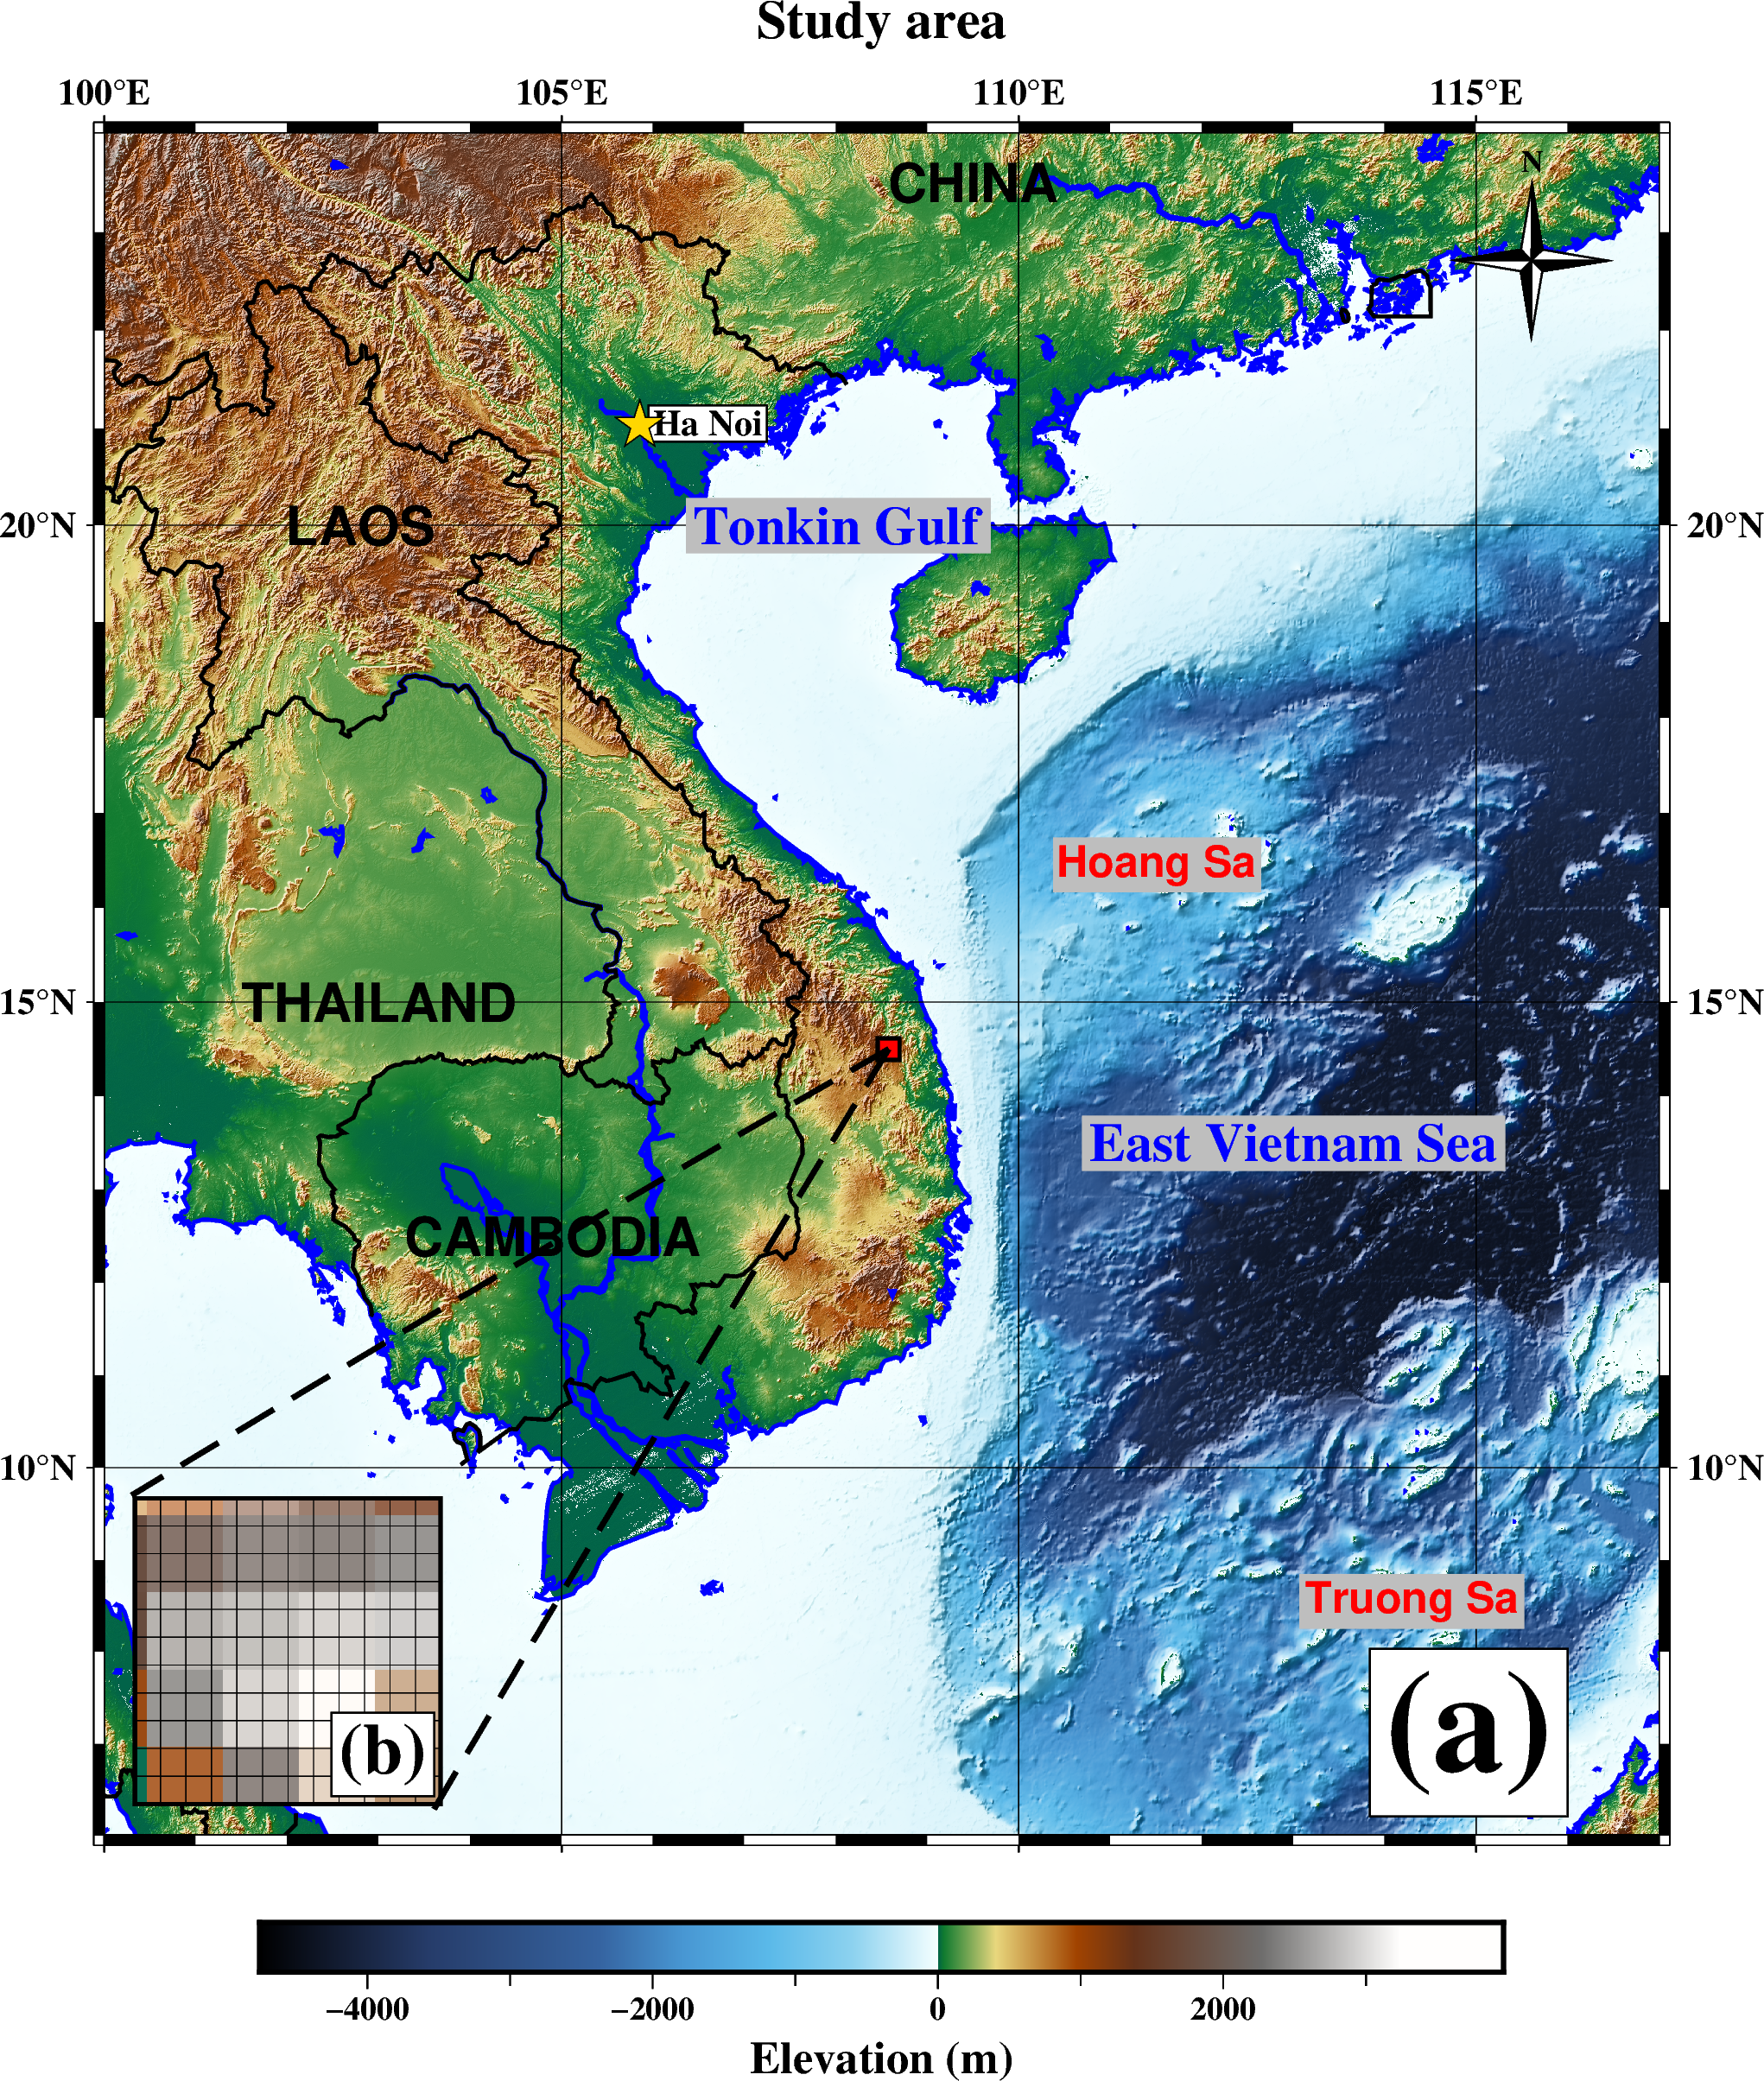

In [6]:
import pygmt
import numpy as np
import pandas as pd
import os
# ===============================================================================================
'''
Figure 1: Introduction
'''
pwd = os.getcwd()

os.makedirs(os.path.join(pwd,"figures"),exist_ok=True)

# Create a figure
fig = pygmt.Figure()
pygmt.config(FONT_LABEL="14p,Times-Bold,black",
             FONT_TITLE="15p,Times-Bold,black",
             FONT_ANNOT_PRIMARY="10p,Times-Bold,black",
             FONT_ANNOT_SECONDARY="10p,Times-Bold,black"
            )

# Define the region: [west, east, south, north]
region = [100, 117, 6, 24]  # Example: Vietnam region

# Use ETOPO1 global topography data (remote grid)
# You can use @earth_relief_01m if you need higher resolution
fig.grdimage(
    grid="@earth_relief_15s",  # 3 arc-minute resolution
    region=region,
    projection="M6i",          # Mercator projection with 6-inch width
    shading=True,              # Optional: adds hillshading
    # frame=None,
    cmap="geo"                 # Colormap (try 'geo', 'dem', 'relief', etc.)
)

# Add coastlines for better visualization
fig.coast(shorelines="1p,blue", borders=["1/1p,black"], resolution="i")
# Add the base map and the rose
fig.basemap(frame=['WEsN+t"Study area"','xafg+l"Longitude (\\260)"','yafg+l"Latitude (\\260)"'],rose="JTR+o-2.0c/-2.0c+w1.5c+f1+l,,,N")

# Add colorbar
fig.colorbar(frame='af+l"Elevation (m)"')
# Add labels for Trường Sa and Hoàng Sa
fig.text(
    text=["Truong Sa", "Hoang Sa"],
    x=[114.3, 111.5],  # approximate longitudes
    y=[8.6, 16.5],     # approximate latitudes
    font="12p,Helvetica-Bold,red",
    fill='gray'
)
# Add all geographic text labels
fig.text(
    text=["Tonkin Gulf", "East Vietnam Sea"],
    x=[ 108.0, 113.0],  # longitudes
    y=[ 20.0, 13.5],       # latitudes
    font="15p,Times-Bold,blue",
    fill='gray'
)
# Add 
# Format: west east south north
# fig.plot(data=[108.5754, 108.5766, 14.4991, 14.5002], style="r", pen="2p,red")
fig.plot(x=[108.5754],y=14.5002, style="s0.3c", pen="1p,black",fill='red')
# --- Inset map: Zoom in on the box ---
with fig.inset(position="JBL+jBL+o0.3c/0.3c+w3.0c/3.0c", box="+p1p,black"):
    # Plot high-res topography in inset
    fig.grdimage(grid="@earth_relief_01s", region=[108.5754, 108.5766, 14.4991, 14.5002],projection="X3.0c/3.0c", shading=True, cmap="geo")
    fig.basemap(frame=["WESN", "x0.00001a0.00001f0.00001g", "y0.00001a0.00001f0.00001g"])
    fig.text( text=["(b)"], x=108.5762,y=14.4993,font="20p,Times-Bold,black",justify="ML",fill="white",pen='0.5p')
# Choose a corner of the red box and the center of the inset
fig.plot(x=[108.5766, 103.5], y=[14.5002, 6.1], pen="1.5p,black,-")
fig.plot(x=[108.5766, 100.3], y=[14.5002, 9.7], pen="1.5p,black,-")
# Optional: label it
fig.text(
    text=["Ha Noi"],
    x=[106.0],
    y=[21.05],
    font="10p,Times-Bold,black",
    justify="ML",
    fill="white",
    pen='0.5p'
)
# Hanoi
fig.plot(x=[105.8544], y=[21.0285], style="a0.5c", fill="gold", pen="black")
#
fig.text(
    text=["LAOS", "CAMBODIA", "THAILAND", "CHINA"],
    x=[102.8, 104.9, 103.0, 109.5],  # longitudes
    y=[20.0, 12.5, 15.0, 23.5],      # latitudes
    font="15p,Helvetica-Bold,black",
    justify="CM"  # Centered
)
fig.text( text=["(a)"], x=114.0,y=7.25,font="40p,Times-Bold,black",justify="ML",fill="white",pen='0.5p')
fig.savefig(os.path.join(pwd,"figures",'00.Introduction.png'),crop=True,dpi=300,transparent=False)
# Show the figure
fig.show()